<a href="https://colab.research.google.com/github/shankar1108/python-project/blob/main/netflix_recommendationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/Netflix_Movies_and_TV_Shows.csv')

In [ ]:
df.head(100)

,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India
...,...,...,...,...,...,...,...
95,Title 96,TV Show,Action,2005,TV-14,2 Seasons,United States
96,Title 97,Movie,Romance,1978,TV-MA,1 Seasons,Germany
97,Title 98,TV Show,Romance,2007,TV-PG,2 Seasons,India
98,Title 99,Movie,Action,1978,PG-13,124 min,Australia


In [ ]:
df.tail()

,Title,Type,Genre,Release Year,Rating,Duration,Country
2995,Title 2996,Movie,Thriller,2007,TV-PG,75 min,Germany
2996,Title 2997,Movie,Drama,2019,G,2 Seasons,Germany
2997,Title 2998,TV Show,Action,1993,R,3 Seasons,Canada
2998,Title 2999,Movie,Drama,1966,PG-13,1 Seasons,Germany
2999,Title 3000,TV Show,Thriller,2015,PG,2 Seasons,United States


In [ ]:
#Data Cleaning
df_copy=df.copy()
df_copy

,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India
...,...,...,...,...,...,...,...
2995,Title 2996,Movie,Thriller,2007,TV-PG,75 min,Germany
2996,Title 2997,Movie,Drama,2019,G,2 Seasons,Germany
2997,Title 2998,TV Show,Action,1993,R,3 Seasons,Canada
2998,Title 2999,Movie,Drama,1966,PG-13,1 Seasons,Germany


In [ ]:
df.shape

(3000, 7)

In [ ]:
df_count=df.isnull().sum()
df_count

,0
Title,0
Type,0
Genre,0
Release Year,0
Rating,0
Duration,0
Country,0


In [ ]:
df_count=df_count['Rating']
df_count

np.int64(0)

In [ ]:
df.describe()

,Release Year
count,3000.000000
mean,1985.935333
std,21.220617
min,1950.000000
25%,1968.000000
50%,1986.000000
75%,2004.000000
max,2023.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating        3000 non-null   object
 5   Duration      3000 non-null   object
 6   Country       3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB


In [ ]:
df.Type.value_counts()

,count
Type,
TV Show,1527
Movie,1473


In [ ]:
df.columns


Index(['Title', 'Type', 'Genre', 'Release Year', 'Rating', 'Duration',
       'Country'],
      dtype='object')

In [ ]:
df["Release Year"].mean()

np.float64(1985.9353333333333)

In [ ]:
df["Release Year"].median()

1986.0

In [ ]:
df.Rating.value_counts()

,count
Rating,
TV-14,441
R,441
PG,434
TV-PG,430
PG-13,422
TV-MA,418
G,414


In [ ]:
df.nunique()

,0
Title,3000
Type,2
Genre,8
Release Year,74
Rating,7
Duration,124
Country,8


In [ ]:
df1=df[['Type','Release Year']]
df1=df1.groupby(['Release Year','Type']).size().reset_index(name='Total_Count')
print(df1)

     Release Year     Type  Total_Count
0            1950    Movie           14
1            1950  TV Show           34
2            1951    Movie           21
3            1951  TV Show           11
4            1952    Movie           14
..            ...      ...          ...
143          2021  TV Show           19
144          2022    Movie           15
145          2022  TV Show           18
146          2023    Movie           19
147          2023  TV Show           12

[148 rows x 3 columns]


Text(0.5, 1.0, 'Count Vs Type of Shows')

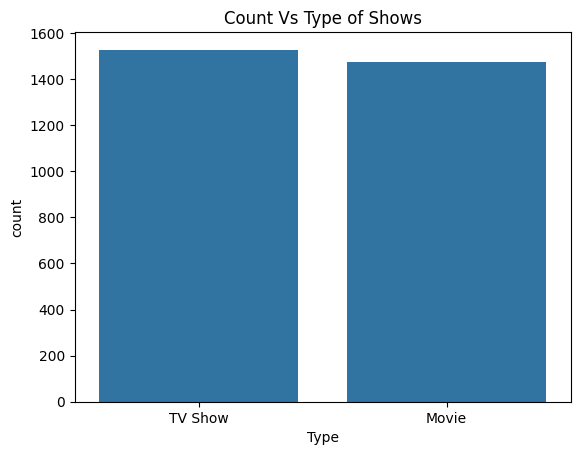

In [ ]:
sns.countplot(x='Type', data=df)
plt.title('Count Vs Type of Shows')

In [ ]:
df['Country'].value_counts().head(15)

,count
Country,
Canada,421
United Kingdom,392
South Korea,376
Germany,373
Australia,371
United States,369
Japan,349
India,349


Text(0.5, 1.0, 'Country wise content on Netflix')

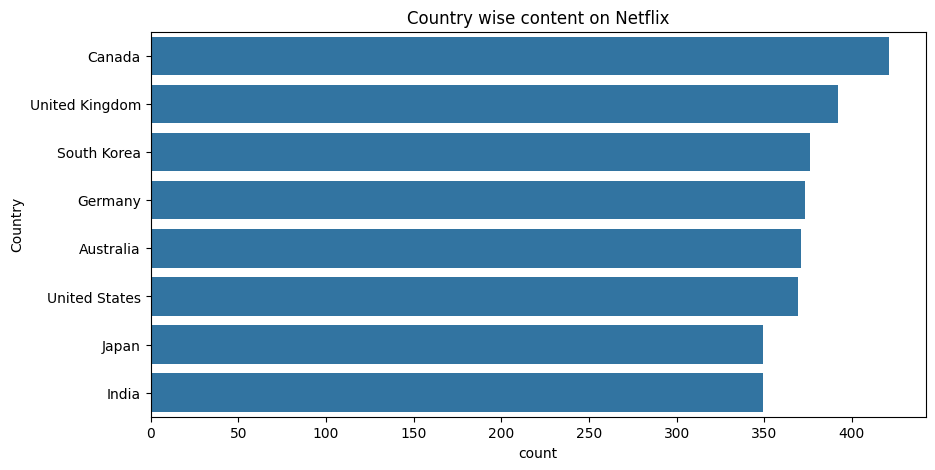

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='Country', order=df['Country'].value_counts().index[0:15],data=df)
plt.title('Country wise content on Netflix')

Text(0.5, 1.0, 'Ratings of shows on Netflix Vs Count')

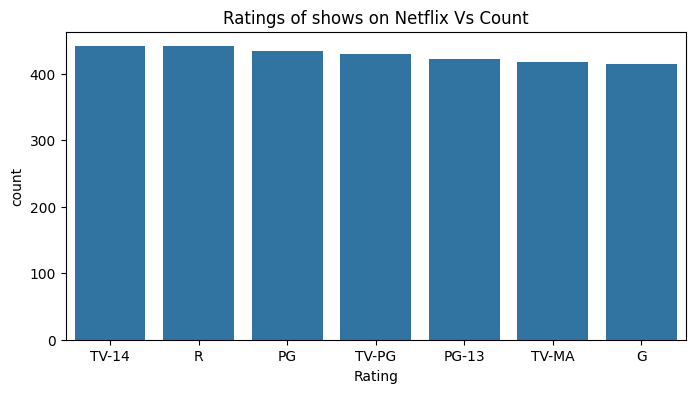

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Rating',order=df['Rating'].value_counts().index[0:15],data=df)
plt.title('Ratings of shows on Netflix Vs Count')

Text(0.5, 1.0, 'Content Release in Years on Netflix Vs Count')

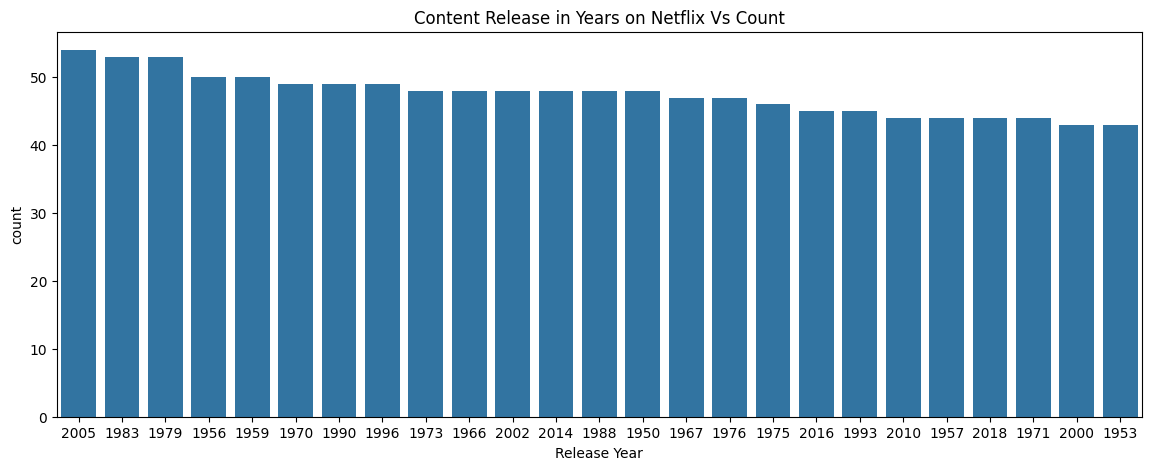

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x='Release Year',order=df['Release Year'].value_counts().index[0:25],data=df)
plt.title('Content Release in Years on Netflix Vs Count')

Text(0.5, 1.0, 'Top 10 Genres on Netflix')

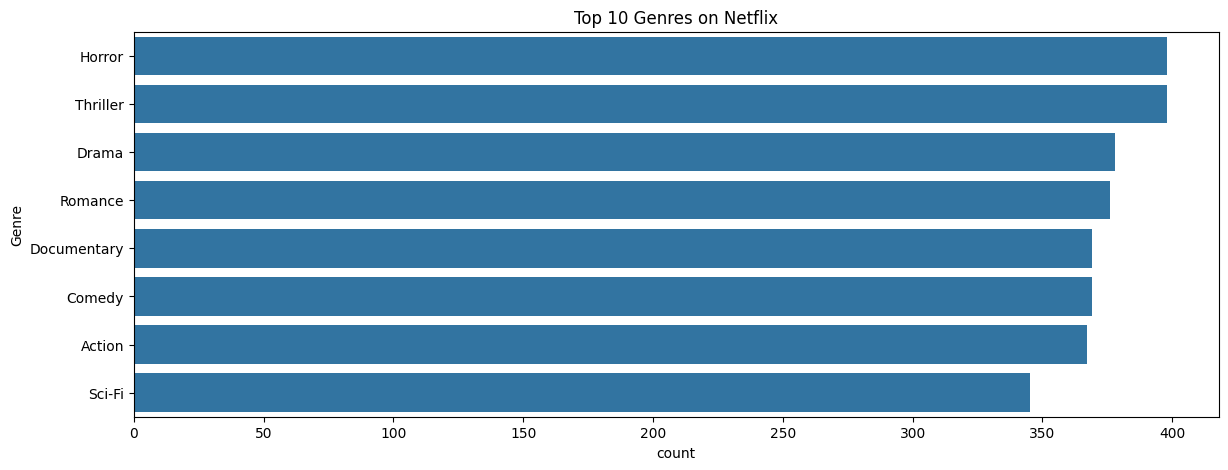

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(y='Genre',order=df['Genre'].value_counts().index[0:10],data=df)
plt.title('Top 10 Genres on Netflix')